In [1]:
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
df=pd.read_csv("cancer patient data sets.csv",index_col='index')

In [2]:
#converting the output variables into numerical values
df['Level'].replace(to_replace = 'Low', value = 1, inplace = True)
df['Level'].replace(to_replace = 'Medium', value = 2, inplace = True)
df['Level'].replace(to_replace = 'High', value = 3, inplace = True)

df['Level'].value_counts()

3    365
2    332
1    303
Name: Level, dtype: int64

In [3]:
#checking for null values
df.isnull().sum()

Patient_Id                  0
Age                         0
Gender                      0
Air_Pollution               0
Alcohol_use                 0
Dust_Allergy                0
OccuPational_Hazards        0
Genetic_Risk                0
chronic_Lung_Disease        0
Balanced_Diet               0
Obesity                     0
Smoking                     0
Passive_Smoker              0
Chest_Pain                  0
Coughing_of_Blood           0
Fatigue                     0
Weight_Loss                 0
Shortness_of_Breath         0
Wheezing                    0
Swallowing_Difficulty       0
Clubbing_of_Finger_Nails    0
Frequent Cold               0
Dry_Cough                   0
Snoring                     0
Level                       0
dtype: int64

In [4]:
df.describe()

,Age,Gender,Air_Pollution,Alcohol_use,Dust_Allergy,OccuPational_Hazards,Genetic_Risk,chronic_Lung_Disease,Balanced_Diet,Obesity,...,Fatigue,Weight_Loss,Shortness_of_Breath,Wheezing,Swallowing_Difficulty,Clubbing_of_Finger_Nails,Frequent Cold,Dry_Cough,Snoring,Level
count,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,37.174000,1.402000,3.8400,4.563000,5.165000,4.840000,4.580000,4.380000,4.491000,4.465000,...,3.856000,3.855000,4.240000,3.777000,3.746000,3.923000,3.536000,3.853000,2.926000,2.062000
std,12.005493,0.490547,2.0304,2.620477,1.980833,2.107805,2.126999,1.848518,2.135528,2.124921,...,2.244616,2.206546,2.285087,2.041921,2.270383,2.388048,1.832502,2.039007,1.474686,0.815365
min,14.000000,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,27.750000,1.000000,2.0000,2.000000,4.000000,3.000000,2.000000,3.000000,2.000000,3.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000
50%,36.000000,1.000000,3.0000,5.000000,6.000000,5.000000,5.000000,4.000000,4.000000,4.000000,...,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,2.000000
75%,45.000000,2.000000,6.0000,7.000000,7.000000,7.000000,7.000000,6.000000,7.000000,7.000000,...,5.000000,6.000000,6.000000,5.000000,5.000000,5.000000,5.000000,6.000000,4.000000,3.000000
max,73.000000,2.000000,8.0000,8.000000,8.000000,8.000000,7.000000,7.000000,7.000000,7.000000,...,9.000000,8.000000,9.000000,8.000000,8.000000,9.000000,7.000000,7.000000,7.000000,3.000000


In [5]:
#droping the patient_id as it is unique for each input
updated_df=df.drop("Patient_Id",axis=1)

<AxesSubplot:>

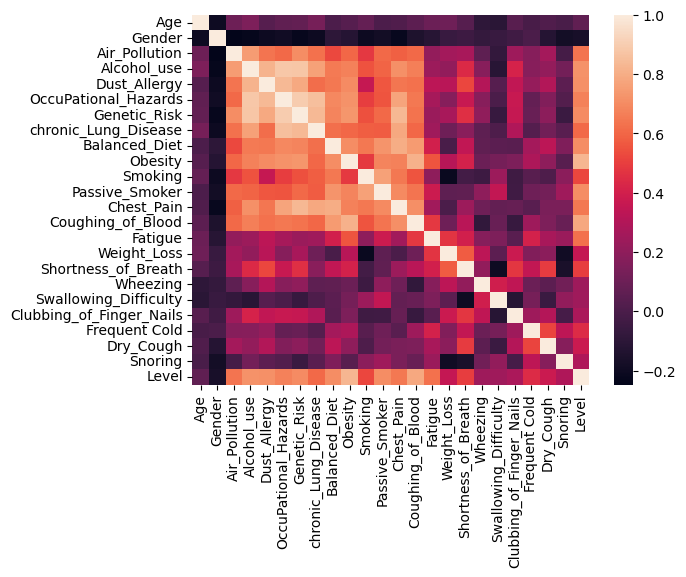

In [6]:
df_corr=df.corr()
sns.heatmap(df_corr)

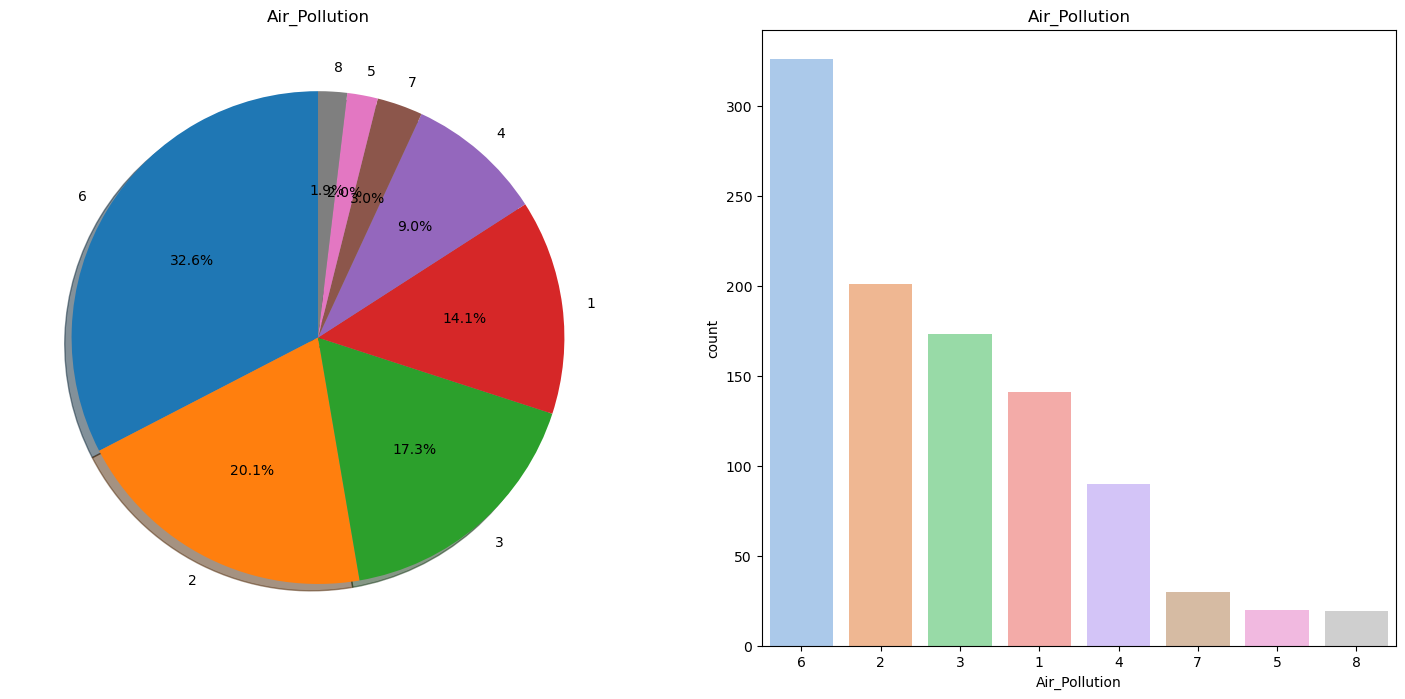

In [7]:
def pie_barplot(column):
    f,ax=plt.subplots(1,2,figsize=(18,8))
    updated_df[column].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True,
                                         startangle=90)
    ax[0].set_title(column)
    ax[0].set_ylabel('')
    sns.countplot(column,data=updated_df,ax=ax[1],palette='pastel', order=df["Air_Pollution"].value_counts().index)
    ax[1].set_title(column)
    return plt.show()

pie_barplot("Air_Pollution")

In [8]:
def crosstab(column):
    return pd.crosstab(updated_df[column],updated_df.Level,margins=True).style.background_gradient(cmap='summer_r')

def ordinalgraph(column):
    f,ax=plt.subplots(1,2,figsize=(18,8))
    updated_df[column].value_counts().plot.bar(ax=ax[0])
    ax[0].set_title(f'Number Of infants by {column}')
    ax[0].set_ylabel('Count')
    sns.countplot(column,hue='Level',data=updated_df,ax=ax[1], order=df[column].value_counts().index)
    ax[1].set_title(f'{column}:Level vs {column}')
    return plt.show()


In [9]:
crosstab("Air_Pollution")

Level,1,2,3,All
Air_Pollution,,,,
1,40,101,0,141
2,111,70,20,201
3,112,61,0,173
4,20,20,50,90
5,10,10,0,20
6,10,70,246,326
7,0,0,30,30
8,0,0,19,19
All,303,332,365,1000


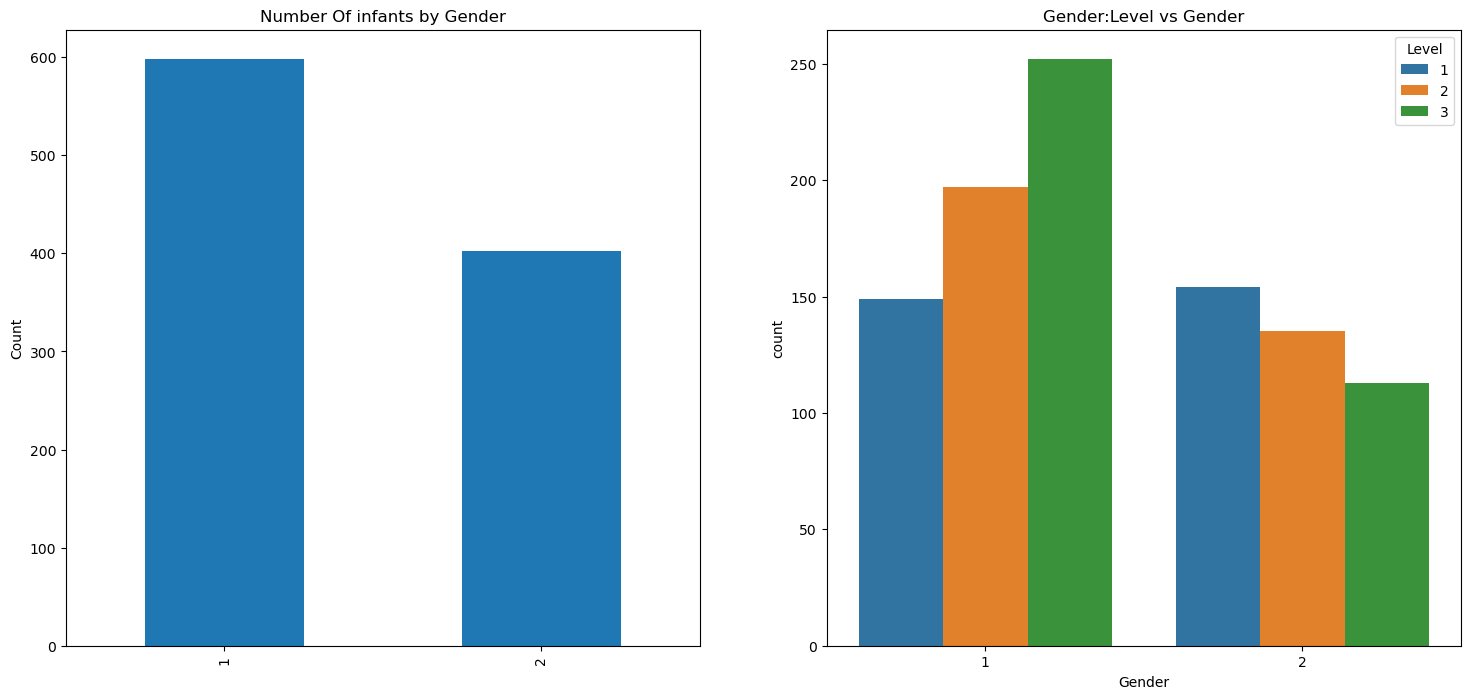

In [10]:
ordinalgraph("Gender")

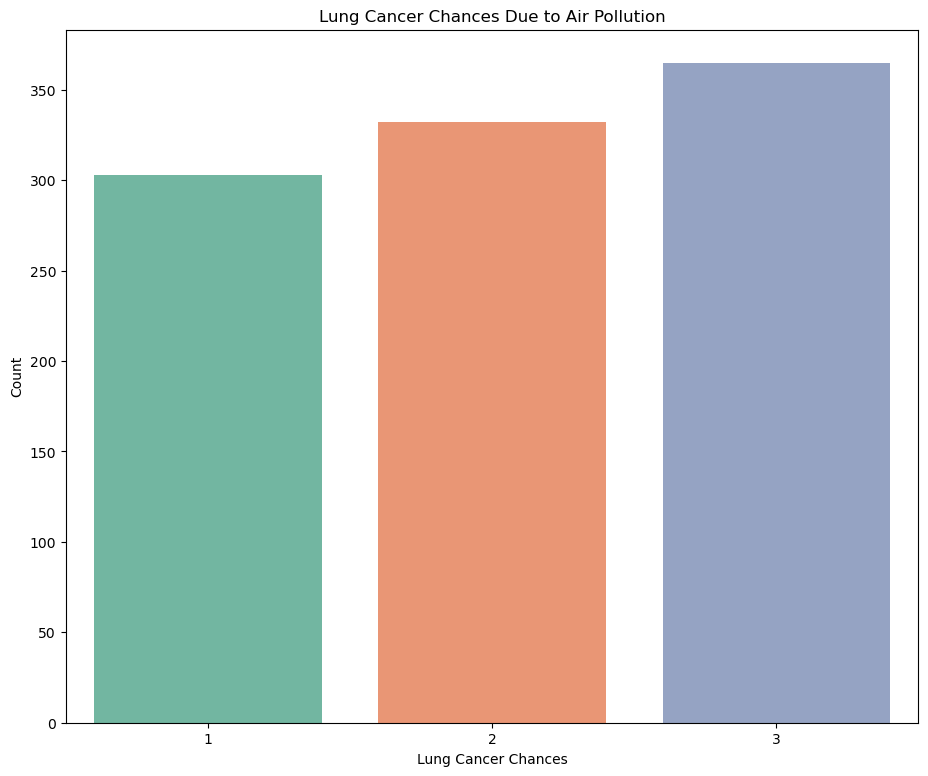

In [11]:
plt.figure(figsize=(11, 9))
plt.title("Lung Cancer Chances Due to Air Pollution")

sns.countplot(x='Level', data=df, palette='Set2')

plt.xlabel("Lung Cancer Chances")
plt.ylabel("Count")

plt.show()

In [12]:
#creating a set of independent variables
predictor_df=updated_df.drop("Level",axis=1)

In [13]:
#checking for multicollinearity
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

data_with_intercept = sm.add_constant(predictor_df)

vif_data = pd.DataFrame()

vif_data['Feature'] = data_with_intercept.columns
vif_data['VIF'] = [variance_inflation_factor(data_with_intercept.values, i) for i in range(data_with_intercept.shape[1])]

print(vif_data)


                     Feature        VIF
0                      const  69.589090
1                        Age   1.238571
2                     Gender   1.279021
3              Air_Pollution   4.339483
4                Alcohol_use  17.593504
5               Dust_Allergy   6.547922
6       OccuPational_Hazards  21.043507
7               Genetic_Risk  20.146458
8       chronic_Lung_Disease   8.770303
9              Balanced_Diet   7.156998
10                   Obesity   7.967699
11                   Smoking   4.926056
12            Passive_Smoker   7.879301
13                Chest_Pain   8.396442
14         Coughing_of_Blood   8.265389
15                   Fatigue   3.785934
16               Weight_Loss   3.761823
17       Shortness_of_Breath   4.794475
18                  Wheezing   2.545996
19     Swallowing_Difficulty   3.227649
20  Clubbing_of_Finger_Nails   2.921871
21             Frequent Cold   2.492983
22                 Dry_Cough   2.264344
23                   Snoring   2.264555


In [14]:
#removing all the variables that has values greater than 5
predicted_df=predictor_df.drop(["Balanced_Diet","Obesity","Alcohol_use","OccuPational_Hazards","Genetic_Risk","chronic_Lung_Disease","Coughing_of_Blood","Dust_Allergy","Passive_Smoker","Coughing_of_Blood"],axis=1)

In [15]:
#selecting the best features for prediction
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
ordered_rank_features=SelectKBest(score_func=chi2,k=8)
#X=updated_df.iloc[:,:-1]
X=predicted_df
y=updated_df['Level']
ordered_feature=ordered_rank_features.fit(X,y)

In [16]:
dfscores=pd.DataFrame(ordered_feature.scores_,columns=["Score"])
dfcolumns=pd.DataFrame(X.columns)

In [17]:
features_rank=pd.concat([dfcolumns,dfscores],axis=1)

In [18]:
features_rank.columns=['Features','Score']
features_rank

,Features,Score
0,Age,44.187202
1,Gender,4.668165
2,Air_Pollution,518.631533
3,Smoking,671.006253
4,Chest_Pain,524.489521
5,Fatigue,518.900446
6,Weight_Loss,206.666563
7,Shortness_of_Breath,330.880709
8,Wheezing,201.426189
9,Swallowing_Difficulty,113.074249


In [19]:
predicted_df

,Age,Gender,Air_Pollution,Smoking,Chest_Pain,Fatigue,Weight_Loss,Shortness_of_Breath,Wheezing,Swallowing_Difficulty,Clubbing_of_Finger_Nails,Frequent Cold,Dry_Cough,Snoring
index,,,,,,,,,,,,,,
0,33,1,2,3,2,3,4,2,2,3,1,2,3,4
1,17,1,3,2,2,1,3,7,8,6,2,1,7,2
2,35,1,4,2,4,8,7,9,2,1,4,6,7,2
3,37,1,7,7,7,4,2,3,1,4,5,6,7,5
4,46,1,6,8,7,3,2,4,1,4,2,4,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,44,1,6,7,7,5,3,2,7,8,2,4,5,3
996,37,2,6,7,7,9,6,5,7,2,4,3,1,4
997,25,2,4,2,4,8,7,9,2,1,4,6,7,2


In [20]:
predicted_df.describe()

,Age,Gender,Air_Pollution,Smoking,Chest_Pain,Fatigue,Weight_Loss,Shortness_of_Breath,Wheezing,Swallowing_Difficulty,Clubbing_of_Finger_Nails,Frequent Cold,Dry_Cough,Snoring
count,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,37.174000,1.402000,3.8400,3.948000,4.438000,3.856000,3.855000,4.240000,3.777000,3.746000,3.923000,3.536000,3.853000,2.926000
std,12.005493,0.490547,2.0304,2.495902,2.280209,2.244616,2.206546,2.285087,2.041921,2.270383,2.388048,1.832502,2.039007,1.474686
min,14.000000,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,27.750000,1.000000,2.0000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
50%,36.000000,1.000000,3.0000,3.000000,4.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000
75%,45.000000,2.000000,6.0000,7.000000,7.000000,5.000000,6.000000,6.000000,5.000000,5.000000,5.000000,5.000000,6.000000,4.000000
max,73.000000,2.000000,8.0000,8.000000,9.000000,9.000000,8.000000,9.000000,8.000000,8.000000,9.000000,7.000000,7.000000,7.000000


<AxesSubplot:>

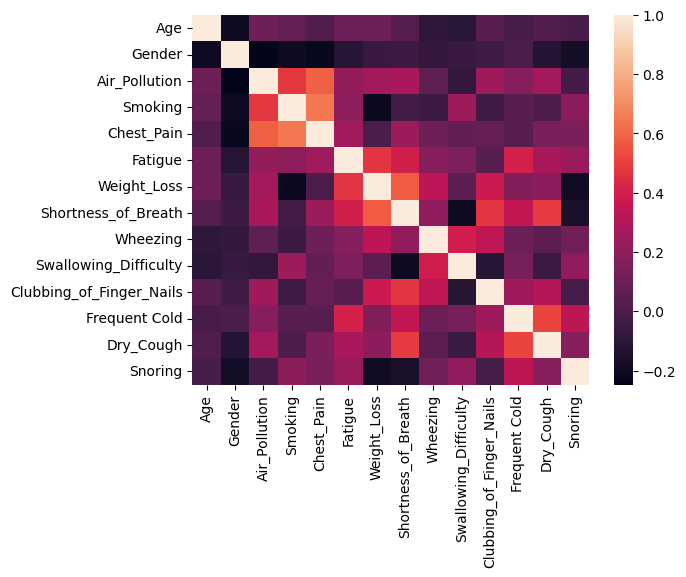

In [21]:
df_corr=predicted_df.corr()
sns.heatmap(df_corr)

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
X_train.shape,X_test.shape

((700, 14), (300, 14))

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
model_rf = RandomForestClassifier()
model_rf.fit(X_train,y_train)
y_pred_rf = model_rf.predict(X_test)


In [24]:
 print("Precision : ", precision_score(y_test, y_pred_rf, average = 'micro'))

Precision :  1.0


In [25]:
print("Recall : ", recall_score(y_test, y_pred_rf, average = 'micro'))

Recall :  1.0


In [26]:
print("Accuracy : ", accuracy_score(y_test, y_pred_rf))

Accuracy :  1.0


In [27]:
print("F1 Score : ", f1_score(y_test, y_pred_rf, average = 'micro'))

F1 Score :  1.0


In [28]:
cm = confusion_matrix(y_test, y_pred_rf)
cm

array([[ 89,   0,   0],
       [  0,  96,   0],
       [  0,   0, 115]], dtype=int64)

In [29]:
import pickle
with open('lung_cancer.pkl','wb') as f:
    pickle.dump(model_rf,f)